In [189]:
import pandas as pd
import numpy as np

from scipy.stats import skew
from scipy.special import boxcox1p

from IPython.display import display
pd.options.display.max_columns = 150
pd.options.display.max_rows = 150

import matplotlib.pyplot as plt

%matplotlib inline

In [190]:
test_raw = pd.read_csv('../data/test.csv')

In [191]:
df = pd.read_pickle('../train_engineered.pkl')

In [192]:
df_test = pd.read_pickle('../test_engineered.pkl')

## Outliers

In [193]:
df = df[~((df['GrLivArea'] > 4000) & (df['SalePrice'] < 300000))]

In [194]:
# filter_outliers = df.iloc[:, 4:17] > 8
# filter_outliers = ~(filter_outliers.sum(1) > 0)

## Skewedness

In [195]:
df.iloc[:, 4:17] = df.iloc[:, 4:17].astype(float)

In [196]:
numeric_feats = df.iloc[:, 4:17].columns

In [197]:
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness

skewed_feats = skewed_feats[skewed_feats > 0.65]

skewed_feats = skewed_feats.index

df[skewed_feats] = boxcox1p(df[skewed_feats], 0.15)
df_test[skewed_feats] = boxcox1p(df_test[skewed_feats], 0.15)


In [200]:
df = df.drop(['1stFlrSF', 'GarageArea', 'PoolArea'], axis=1)
df_test = df_test.drop(['1stFlrSF', 'GarageArea', 'PoolArea'], axis=1)

## X/y Split

In [201]:
X = df.drop('SalePrice', axis=1)
y = df.SalePrice.apply(lambda x: np.log1p(x))

## Random Forest (with random noise)

In [14]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X_noise = df.drop('SalePrice', axis=1)
X_noise['Random_Noise'] = np.random.random(size=len(X_noise))

rf = RandomForestRegressor(n_estimators=5000, max_features=10, oob_score=True)
rf.fit(X_noise, y)
importance = pd.DataFrame({'feature': X_noise.columns, 'f_importance' : rf.feature_importances_})

In [16]:
rf.score(X_noise, y)

0.9799217735017037

In [60]:
importance.sort_values(by='f_importance', ascending=False).reset_index(drop=True)

,feature,f_importance
0,GrLivArea,0.055749
1,TotalBsmtSF,0.047361
2,GarageArea,0.044707
3,1stFlrSF,0.042678
4,GarageCars_3.0,0.038958
5,YearBuilt,0.033691
6,BsmtFinSF1,0.030842
7,BsmtQual_Ex,0.027813
8,2ndFlrSF,0.026697
9,FullBath_1.0,0.025247


In [12]:
random_importance = importance.f_importance[importance.feature == 'Random_Noise'].item()
features = list(importance.feature[importance.f_importance > random_importance])

In [ ]:
from sklearn.linear_model import LinearRegression
X = df[features]
y = df.SalePrice

lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

## Grid Search

In [203]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

lasso = Lasso(max_iter=5000)

alphas = np.logspace(-5, -4, 100)

grid = GridSearchCV(estimator=lasso,
    param_grid=dict(alpha=alphas), cv=10, scoring='r2')

grid.fit(X, y)

y_hats = grid.best_estimator_.predict(X)
test_predictions = np.expm1(grid.best_estimator_.predict(df_test))

grid.best_estimator_.fit(X, y)
grid.best_estimator_.score(X, y)

TypeError: fit() missing 1 required positional argument: 'y'

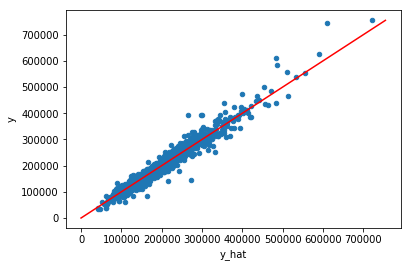

In [205]:
true_line = np.linspace(0, df.SalePrice.max(), 50)

pd.DataFrame({'y_hat': np.expm1(y_hats), 'y': df.SalePrice}).plot(
    kind='scatter', x='y_hat', y='y').plot(
    true_line, true_line,  c='red')


In [102]:
test_predictions = np.expm1(grid.best_estimator_.predict(df_test))

In [206]:
pd.DataFrame({'Id': test_raw['Id'], 'SalePrice': test_predictions}).to_csv('/home/gavagai/jails/chromium/Downloads/predictions.csv', index=False)

In [ ]:
# !kaggle competitions submit -c house-prices-advanced-regression-techniques -f submission.csv -m "Message"